**Importing all requiste library**

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

**Creating Dataframe**

In [193]:
df=pd.read_csv('/content/car_purchasing.csv', encoding='ISO-8859-1')

**Data Analysis and Cleaning**

In [194]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [195]:
df.isna().sum()

,0
customer name,0
customer e-mail,0
country,0
gender,0
age,0
annual Salary,0
credit card debt,0
net worth,0
car purchase amount,0


In [196]:
df.duplicated().sum()

np.int64(0)

In [197]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


**Creating new datframe in order to drop columns which are string and not required**

In [198]:
df_new = df.drop(columns=['customer name', 'customer e-mail', 'country'])

**Saving relevant features of data in a column and converting numpy into dataframe**

In [199]:
original_cols_for_df_new = df.drop(columns=['customer name', 'customer e-mail', 'country']).columns
df_processed = pd.DataFrame(df_new, columns=original_cols_for_df_new)
print ("Columns in new dataset- \n" , original_cols_for_df_new)
df_processed.describe()

Columns in new dataset- 
 Index(['gender', 'age', 'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')


,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


**Defining X and Y for split data and assigning features (columns) to them**

In [200]:
X = df_processed.drop('car purchase amount', axis=1)
y = df_processed['car purchase amount']
X.describe()

,gender,age,annual Salary,credit card debt,net worth
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340
min,0.000000,20.000000,20000.000000,100.000000,20000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000


**Reviewing Train and Test Data to ensiure they have same features**

In [201]:
print("Data Preparation:")
print(f"  Features (X) shape: {X.shape}")
print(f"  Target (y) shape: {y.shape}")

Data Preparation:
  Features (X) shape: (500, 5)
  Target (y) shape: (500,)


**# Split data: 80% training, 20% testing**

In [202]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nData Split:")
print(f"  Training samples: {X_train.shape[0]} ({(X_train.shape[0]/X.shape[0])*100:.1f}%)")
print(f"  Testing samples: {X_test.shape[0]} ({(X_test.shape[0]/X.shape[0])*100:.1f}%)")
print(f"  Features in Train data : {X_train.shape[1]}")
print(f"  Features in Test data : {X_test.shape[1]}")


Data Split:
  Training samples: 400 (80.0%)
  Testing samples: 100 (20.0%)
  Features in Train data : 5
  Features in Test data : 5


**# Feature Scaling (Normalization)**

In [203]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

In [204]:
print("✓ Features normalized using StandardScaler (mean 0, std 1)")
print(f"  X_train range: [{X_train.min():.4f}, {X_train.max():.4f}]")
print(f"  y_train range: [{y_train.min():.4f}, {y_train.max():.4f}]")

✓ Features normalized using StandardScaler (mean 0, std 1)
  X_train range: [-3.5313, 3.2384]
  y_train range: [-3.2246, 3.3269]


**Build Artificial Neural Network (ANN) Model**

In [205]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)   # Regression
])

print("✓ Model architecture created!")
print("\nModel Summary:")
model.summary()

✓ Model architecture created!

Model Summary:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

**Compile the model**

In [206]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

print("✓ Model compiled successfully!")
print("  Optimizer: Adam")
print("  Loss Function: Mean Squared Error (MSE)")
print("  Metrics: Mean Absolute Error (MAE)")

✓ Model compiled successfully!
  Optimizer: Adam
  Loss Function: Mean Squared Error (MSE)
  Metrics: Mean Absolute Error (MAE)


**Train the Model**

In [207]:
from tensorflow.keras.callbacks import EarlyStopping

# Setup callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

print("Training Configuration:")
print("  Epochs: 100")
print("  Batch Size: 32")
print("  Validation Split: 20%")
print("  Early Stopping: Enabled (patience=15)")
print("\nStarting training...\n")

Training Configuration:
  Epochs: 100
  Batch Size: 32
  Validation Split: 20%
  Early Stopping: Enabled (patience=15)

Starting training...



**Train the model**

In [208]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,

)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.6686 - mae: 0.6358 - val_loss: 0.3247 - val_mae: 0.4313
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3428 - mae: 0.4501 - val_loss: 0.1315 - val_mae: 0.2613
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1076 - mae: 0.2486 - val_loss: 0.0378 - val_mae: 0.1351
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0323 - mae: 0.1401 - val_loss: 0.0260 - val_mae: 0.1270
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0254 - mae: 0.1289 - val_loss: 0.0205 - val_mae: 0.1144
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0170 - mae: 0.1058 - val_loss: 0.0147 - val_mae: 0.0914
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0097 - mae: 0.0797 - val_loss: 0.0123 - val_mae: 0.0797
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0072 - mae: 0.0653 - val_loss: 0.0103 - val_mae: 0.0738
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.

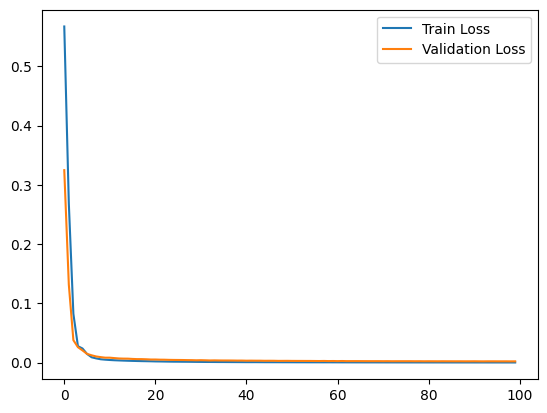

In [209]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

** Visualize training history**

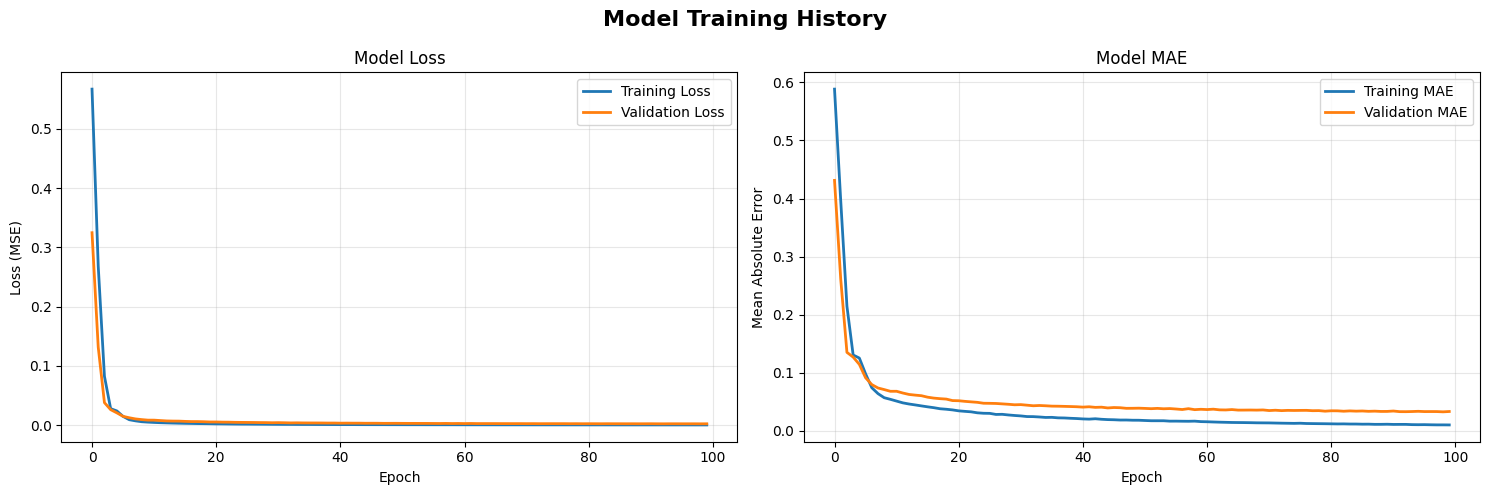


Final Metrics:
  Training Loss: 0.000169
  Validation Loss: 0.002091
  Training MAE: 0.010138
  Validation MAE: 0.033266


In [210]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Model Training History', fontsize=16, fontweight='bold')

# Loss plot
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('Model Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MAE plot
axes[1].plot(history.history['mae'], label='Training MAE', linewidth=2)
axes[1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_title('Model MAE')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Mean Absolute Error')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFinal Metrics:")
print(f"  Training Loss: {history.history['loss'][-1]:.6f}")
print(f"  Validation Loss: {history.history['val_loss'][-1]:.6f}")
print(f"  Training MAE: {history.history['mae'][-1]:.6f}")
print(f"  Validation MAE: {history.history['val_mae'][-1]:.6f}")

**Make Prediction on test data**

In [211]:
# Make predictions on test set
print("Making predictions on test data...\n")

y_pred_scaled = model.predict(X_test, verbose=0)

# Inverse transform to get actual prices
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print("✓ Predictions completed!")
print(f"  Predictions shape: {y_pred.shape}")

Making predictions on test data...

✓ Predictions completed!
  Predictions shape: (100, 1)


In [212]:
# This cell was overwriting the inverse-transformed y_pred with scaled predictions.
# Removing its content to ensure y_pred remains unscaled from GEiUYvNqynz-.
# y_pred = model.predict(X_test)
# y_pred = y_pred.flatten()

**Comparing Actual against Predicted number**

In [213]:
comparison = pd.DataFrame({
    "Actual": y_test_original.flatten(), # Use the inverse-transformed actual values
    "Predicted": y_pred_original.flatten() # Ensure predictions are flattened
})
comparison.head(10)

,Actual,Predicted
0,46082.80993,45729.949219
1,45058.89690,45762.246094
2,63079.84329,63226.570312
3,31837.22537,31439.958984
4,60461.24268,61100.843750
5,63140.05082,63617.921875
6,52477.83479,52416.726562
7,54755.42038,54815.339844
8,52707.96816,52824.250000
9,47869.82593,48827.875000


In [214]:
# Show last 10 predictions vs actuals
print("\nLast 10 Predictions vs Actual Prices:")
print("="*60)

comparison_df = pd.DataFrame({
    'Actual Price': y_test_original[-10:].flatten(), # Flatten to 1D
    'Predicted Price': y_pred_original[-10:].flatten(),
    'Error': y_test_original[-10:].flatten() - y_pred_original[-10:].flatten(),
    'Error %': ((y_test_original[-10:].flatten() - y_pred_original[-10:].flatten()) / y_test_original[-10:].flatten() * 100)
})

comparison_df.index = range(len(comparison_df), 0, -1)

print(comparison_df.to_string())
print("="*60)


Last 10 Predictions vs Actual Prices:
    Actual Price  Predicted Price        Error   Error %
10   29540.87013     28913.929688   626.940442  2.122282
9    37364.23474     36834.886719   529.348021  1.416724
8    30964.07804     32891.996094 -1927.918054 -6.226305
7    41137.89459     41733.519531  -595.624941 -1.447874
6    32208.37522     32095.845703   112.529517  0.349380
5    49079.29461     49607.203125  -527.908515 -1.075624
4    45167.32542     44976.238281   191.087139  0.423065
3    50958.08115     50761.488281   196.592869  0.385793
2    43898.27330     43981.769531   -83.496231 -0.190204
1    53017.26723     52764.070312   253.196917  0.477574


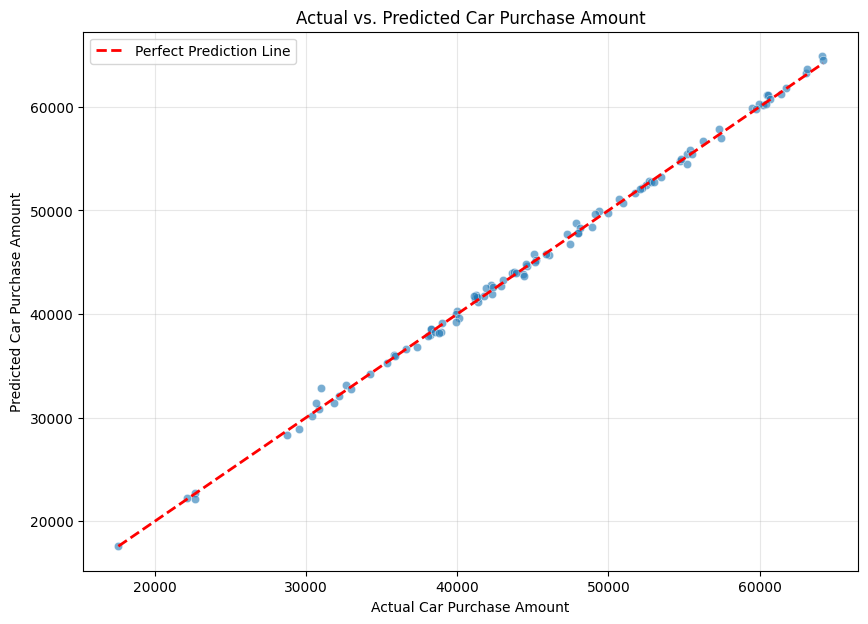

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test_original.flatten(), y=y_pred_original.flatten(), alpha=0.6)
plt.plot([min(y_test_original.flatten()), max(y_test_original.flatten())], [min(y_test_original.flatten()), max(y_test_original.flatten())], color='red', linestyle='--', lw=2, label='Perfect Prediction Line')
plt.title('Actual vs. Predicted Car Purchase Amount')
plt.xlabel('Actual Car Purchase Amount')
plt.ylabel('Predicted Car Purchase Amount')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [219]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Ensure numpy is imported

mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 349.61368776535613
R² Score: 0.9988679618969898


**Save the Trained Keras Model**

In [220]:
model.save('car_purchase_prediction_model.keras')
print("Keras model saved to 'car_purchase_prediction_model.keras'")

Keras model saved to 'car_purchase_prediction_model.keras'


**Save the Scalers**

In [221]:
import joblib

joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

print("scaler_X saved to 'scaler_X.pkl'")
print("scaler_y saved to 'scaler_y.pkl'")

scaler_X saved to 'scaler_X.pkl'
scaler_y saved to 'scaler_y.pkl'
